# Homework #6:
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 10/5/2019|
|Updated | 10/5/2019|

## 9.6 Fourier Transform

### 1. From web
- 1. Dowoload the data from http://www-personal.umich.edu/~mejn/cp/data/circular.txt
- 2. Use Fourier transform to process the image and figure out how to compress the data.
- 3. Compare it with the size which you obtained via plt.savefig()

In [ ]:
import urllib.request
import matplotlib.pyplot as plt
import numpy as np

req = urllib.request.Request('http://www-personal.umich.edu/~mejn/cp/data/circular.txt')
response = urllib.request.urlopen(req)
the_page = response.read().decode()

print(the_page[:100])
data = the_page
data = np.fromstring(data, dtype="float", sep='\n').reshape([501, 501])
print(np.shape(data))
plt.imshow(data, origin="lower")
plt.show()

#### Start with an image
Let's first generate a colored, 2D image using NumPy's __imshow()__ using a dataset consisting of 501 rows and columns (i.e., 501x501), where each element contains a value from -1 to 1 that corresponds to the "intensity" of the pixel (-1 being the darkest, 1 being the brightest, as seen in the color bar to the right). 

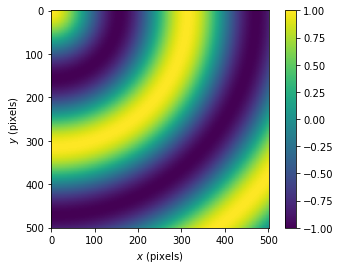

<Figure size 432x288 with 0 Axes>

In [123]:
import matplotlib.pyplot as plt
import numpy as np

data1 = np.loadtxt("hw06/circular.txt", float)
plt.imshow(data1)
plt.colorbar()
plt.xlabel(r'$x$ (pixels)')
plt.ylabel(r'$y$ (pixels)')
plt.show()
plt.savefig("hw06/original.png")

#### Slicing the Data
Similarly, we can take a "slice" of the data and look at how the intensity along the first row of pixels in the image (i.e., $y=0$) behaves as a function of $x$.

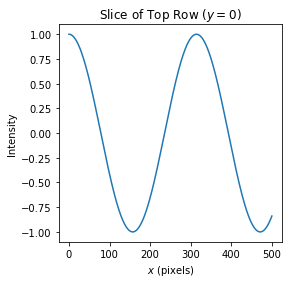

In [133]:
# plot of single line
plt.figure(figsize=[4, 4])
plt.title("Slice of Top Row ($y=0$)")
plt.plot(data1[0])
plt.xlabel(r'$x$ (pixels)')
plt.ylabel('Intensity')
plt.show()

#### Fourier Transform Time! (FTT!)

Now we'll compute the Fourier transform of the dataset (i.e., pixel data), using NumPy's __Fast-Fourier Transform__ in two dimensions, __fft.fft2()__. and plot the amplitude spectrum, showing the intensity as a function of frequency (in reciprocal space of the pixels along the $x$ axis).

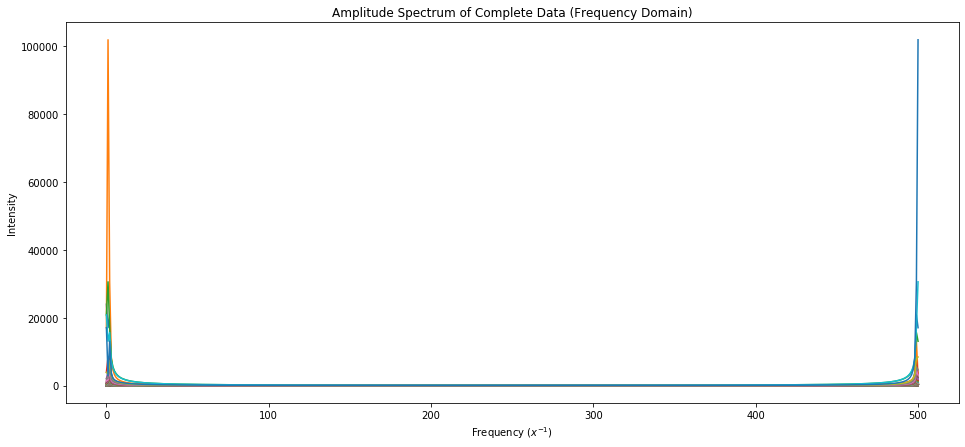

In [124]:
# compute 2D FFT of dataset and store in complex array
c1 = np.fft.fft2(data1)

# plot frequency space
plt.figure(figsize=[16, 7])
plt.title("Amplitude Spectrum of Complete Data (Frequency Domain)")
plt.plot(np.abs(c1))
plt.xlabel(r'Frequency $(x^{-1})$')
plt.ylabel('Intensity')
plt.show()

#### Why so many colored plots?

Again, since the 2D image represents a 2D dataset, what we're seeing is the Fourier transform for each single, horizontal line of pixels in the image (i.e., each individual row in the dataset). To see this more clearly, let's only plot the FTs of the first three horizontal lines—or dataset rows—of the image

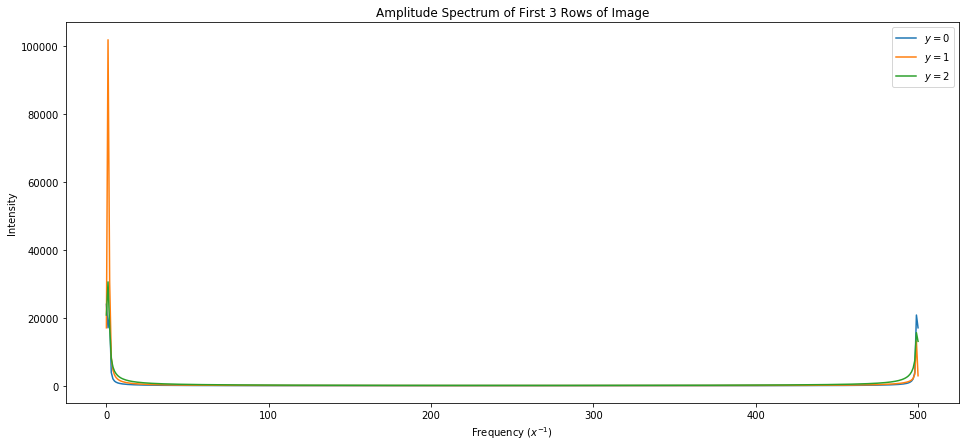

In [58]:
# plot frequency space
plt.figure(figsize=[16, 7])
plt.title("Amplitude Spectrum of First 3 Rows of Image")
plt.plot(np.abs(c1[0]), label='$y=0$')
plt.plot(np.abs(c1[1]), label='$y=1$')
plt.plot(np.abs(c1[2]), label='$y=2$')
plt.legend(loc='best')
plt.xlabel(r'Frequency $(x^{-1})$')
plt.ylabel('Intensity')
plt.show()

The blue line corresponding to $y=0$ is in fact the 1D FT of the "slice" graph we saw earlier.

#### Compression Time
Now that we have the FT of the data in hand, we can "compress" the data by removing from it all the coefficients that correspond to very low intensities in frequency space. What should remain is only the most "characteristic waves" of the dataset—and of the corresponding image.

Since we're dealing with a 2D dataset, one approach is to discard coefficients from the FT for each horizontal line, or row of pixels.

In [ ]:
for i in range

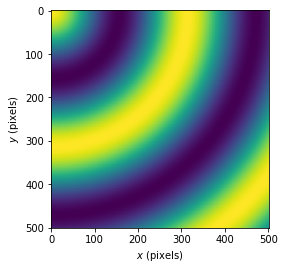

<Figure size 432x288 with 0 Axes>

In [118]:
data2 = np.array()
for 

#c2 = c1[np.abs(c1) > 1e5]     # remove the small coefficients
data2 = np.fft.ifft2(c1).real # perform inverse FFT
                              # NOTE: the data type returned is complex
                              # (128-bit), unlike the original "data1"
                              # whose dtype is 64-bit floating point

# plt.imshow(data2)
# plt.xlabel(r'$x$ (pixels)')
# plt.ylabel(r'$y$ (pixels)')
# plt.show()
# plt.savefig("hw06/compressed.png")

## 10.4 Fast Fourier Transform

Choose a particular application and perform fft analysis, and illustrate how fft helps.